In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['Job_Posted_Date']=pd.to_datetime(df['job_posted_date'])

In [6]:
df.iloc[0:10]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_Posted_Date
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01-14 13:18:07
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10-10 13:14:55
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08-07 14:29:36
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",2023-11-07 14:01:59
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",2023-03-27 13:18:18
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...",2023-12-07 13:40:49
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow...",2023-06-05 13:44:34
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-04-23 13:02:57


In [2]:
df.loc[:,'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [3]:
median_salary_year=df['salary_year_avg'].median()

In [4]:
median_salary_hour=df['salary_hour_avg'].median()

In [7]:
df_filled=df
df['salary_year_avg']=df_filled['salary_year_avg'].fillna(median_salary_year)
df['salary_hour_avg']=df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [8]:
df_filled.loc[:10,'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [10]:
df_unique=df_filled
df_unique=df_unique.drop_duplicates()

In [11]:
df_unique=df_unique.drop_duplicates(subset=['job_title','company_name'])

In [16]:
df.sample(10,random_state=42)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_Posted_Date
502901,Senior Data Engineer,Senior Data Engineer,"St Paul, MN",via BeBee,Full-time,False,"Florida, United States",2023-12-17 11:09:06,False,False,United States,None,115000.0,45.98,ManpowerGroup,"['sql', 'azure', 'git']","{'cloud': ['azure'], 'other': ['git'], 'progra...",2023-12-17 11:09:06
406337,Senior Data Scientist,Senior Analytics Engineer,"London, UK",via LinkedIn,Full-time,False,United Kingdom,2023-10-06 16:09:56,False,False,United Kingdom,None,115000.0,45.98,Harnham,"['sql', 'python', 'bigquery', 'snowflake', 'lo...","{'analyst_tools': ['looker'], 'cloud': ['bigqu...",2023-10-06 16:09:56
659951,Data Engineer,Data Engineer,"Newcastle upon Tyne, UK",via Indeed,Full-time,False,United Kingdom,2023-09-06 10:11:25,True,False,United Kingdom,None,115000.0,45.98,Morgan King,None,None,2023-09-06 10:11:25
541593,Data Analyst,Data Analyst,Malta,via Trabajo.org,Full-time,False,Malta,2023-02-14 21:14:18,True,False,Malta,None,115000.0,45.98,Konnekt,['jira'],{'async': ['jira']},2023-02-14 21:14:18
425158,Senior Data Engineer,Senior Data Engineer. Job in Amsterdam NBC4i Jobs,"Amsterdam, Netherlands",via NBC4i Jobs,Full-time,False,Netherlands,2023-06-19 16:34:30,True,False,Netherlands,None,115000.0,45.98,Independent Recruiters,['python'],{'programming': ['python']},2023-06-19 16:34:30
183426,Data Analyst,Data Analyst,Singapore,via Singapore | JobsDB,Full-time,False,Singapore,2023-11-09 16:07:57,False,False,Singapore,None,115000.0,45.98,FLEXOSENSE PTE. LTD.,"['r', 'python', 'java', 'sql', 'sql server', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",2023-11-09 16:07:57
287790,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-07-14 17:02:23,True,False,United States,None,115000.0,45.98,Iris Software Inc.,"['sql', 'hadoop', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['ha...",2023-07-14 17:02:23
541983,Data Analyst,"Data Analyst, Cloud Systems Jobs","Chantilly, VA",via Clearance Jobs,Full-time,False,Georgia,2023-06-15 19:44:34,False,False,United States,None,115000.0,45.98,SAIC,"['sql', 'r', 'matlab', 'python', 'oracle', 'aw...","{'analyst_tools': ['power bi', 'tableau', 'qli...",2023-06-15 19:44:34
416896,Data Scientist,Alternant Actuariat & Data Science H/F,France,via LinkedIn,Full-time,False,France,2023-09-22 16:47:24,False,False,France,None,115000.0,45.98,KPMG France,None,None,2023-09-22 16:47:24
780907,Data Engineer,"Data Engineer with Fivetran,Qlik Must","Mexico City, CDMX, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-16 06:19:09,False,False,Mexico,None,115000.0,45.98,CORUS Consulting,"['oracle', 'snowflake', 'aws', 'azure', 'alter...","{'analyst_tools': ['alteryx'], 'cloud': ['orac...",2023-01-16 06:19:09


In [17]:
dataset=load_dataset('lukebarousse/data_jobs')
df_original=dataset['train'].to_pandas()


In [18]:
df_original

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [19]:
df_altered=df_original.copy()

In [20]:
df.pivot_table(index='job_title_short',aggfunc='size')

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [21]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [25]:
df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,115000.0,NaN,115000.0,NaN,115000.0,NaN,115000.0,NaN,NaN,NaN
Albania,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Algeria,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,NaN,115000.0,NaN,115000.0
Angola,115000.0,NaN,115000.0,115000.0,115000.0,NaN,NaN,NaN,115000.0,115000.0
Argentina,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Vietnam,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0,115000.0
Yemen,115000.0,NaN,115000.0,115000.0,NaN,NaN,NaN,NaN,NaN,115000.0


<Axes: xlabel='job_country'>

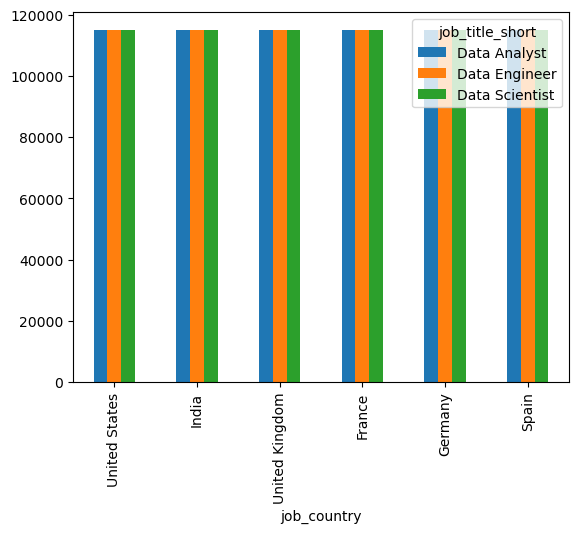

In [28]:
top_countries=df['job_country'].value_counts().head(6).index
df_job_country_salary=df.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')
df_job_country_salary=df_job_country_salary.loc[top_countries]
job_titles=['Data Analyst','Data Engineer','Data Scientist']
df_job_country_salary=df_job_country_salary[job_titles]
df_job_country_salary.plot(kind='bar')

In [29]:
df.index

RangeIndex(start=0, stop=785741, step=1)

In [31]:
df.index.name='job_index'

In [32]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_Posted_Date
job_index,,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,115000.0,45.98,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023-01-14 13:18:07
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,115000.0,45.98,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023-10-10 13:14:55
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,115000.0,45.98,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023-08-07 14:29:36


In [41]:
df_usa=df[df['job_country']=='United States']

In [42]:
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_Posted_Date
job_index,,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,115000.0,45.98,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",2023-11-07 14:01:59
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,115000.0,45.98,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",2023-03-27 13:18:18
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,115000.0,45.98,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-04-23 13:02:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,115000.0,45.98,JPMorgan Chase & Co.,None,None,2023-10-16 06:01:53
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,115000.0,45.98,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-07-16 06:01:27
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,45.98,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",2023-04-21 06:02:31


In [36]:
df_usa.reset_index(inplace=True)
df_usa

,index,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_Posted_Date
0,0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
1,1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
2,2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,115000.0,45.98,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",2023-11-07 14:01:59
3,3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,115000.0,45.98,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",2023-03-27 13:18:18
4,4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,115000.0,45.98,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-04-23 13:02:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206287,206287,785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,115000.0,45.98,JPMorgan Chase & Co.,None,None,2023-10-16 06:01:53
206288,206288,785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,115000.0,45.98,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-07-16 06:01:27
206289,206289,785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,45.98,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",2023-04-21 06:02:31
206290,206290,785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,115000.0,45.98,Axelon Services Corporation,None,None,2023-01-28 06:02:55


In [43]:
df_usa.set_index('job_index',inplace=True)
df_usa

KeyError: "None of ['job_index'] are in the columns"

In [44]:
df_usa.sort_index(inplace=True)
df_usa

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,Job_Posted_Date
job_index,,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,115000.0,45.98,Boehringer Ingelheim,None,None,2023-06-16 13:44:15
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,115000.0,45.98,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023-07-04 13:01:41
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,115000.0,45.98,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",2023-11-07 14:01:59
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,115000.0,45.98,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",2023-03-27 13:18:18
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,115000.0,45.98,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",2023-04-23 13:02:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,115000.0,45.98,JPMorgan Chase & Co.,None,None,2023-10-16 06:01:53
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,115000.0,45.98,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",2023-07-16 06:01:27
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,45.98,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",2023-04-21 06:02:31


In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [2]:
df_US= df[df['job_country']=='United States'].copy()

In [10]:
df_US['job_posted_month']=df_US['job_posted_date'].dt.strftime('%B')

In [11]:
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job-_posted_month,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July,July
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '...",November,November
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['...",March,March
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",April,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None,October,October
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","['sql', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",July,July
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"['python', 'matlab', 'r']","{'programming': ['python', 'matlab', 'r']}",April,April
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,January,January


In [20]:
df_US_pivot=df_US.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [27]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no']=pd.to_datetime(df_US_pivot['job_posted_month'], format ='%B').dt.month

df_US_pivot['month_no']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: month_no, dtype: int32

In [28]:
df_US_pivot.sort_values('month_no',inplace=True)
df_US_pivot.set_index('job_posted_month',inplace=True)

In [29]:
df_US_pivot.drop(columns='month_no',inplace=True)

In [30]:
df_US_pivot

job_title_short,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,,
January,4,527,36,8494,2655,6915,60,1544,773,1552,114
February,3,447,24,6124,3060,4956,56,1258,878,1127,90
March,7,438,19,6218,3183,4779,59,1114,829,1150,115
April,0,565,40,6049,2801,4867,51,1025,781,991,112
May,8,279,20,4993,2976,4377,49,839,746,914,90
June,6,446,32,5683,2893,4645,48,1009,812,1033,93
July,5,581,39,5201,2570,4876,65,883,747,1095,153
August,1,903,39,6634,3269,6318,68,1186,903,1515,194
September,11,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_month'>

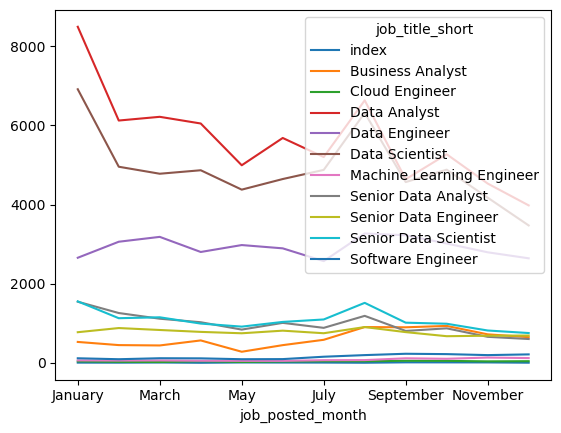

In [31]:
df_US_pivot.plot(kind='line')

In [33]:
top_3=df_US['job_title_short'].value_counts().head(3)
top_3=top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

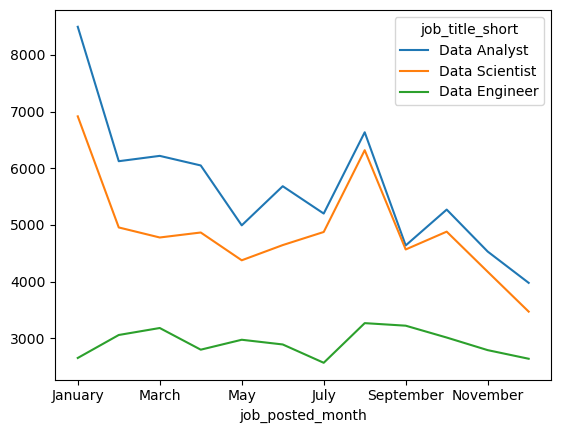

In [34]:
df_US_pivot[top_3].plot(kind='line')

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [38]:
df_US_software_pivot=pd.read_csv('https://lukeb.co/software_csv',index_col='job_posted_month')
df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [40]:
df_US_merged=df_US_pivot.merge(df_US_software_pivot,on='job_posted_month')

In [48]:
top_5=(df_US_merged
       .sum()
       .sort_values(ascending=False)
       .head()
       .index
       .to_list())
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

<Axes: xlabel='job_posted_month'>

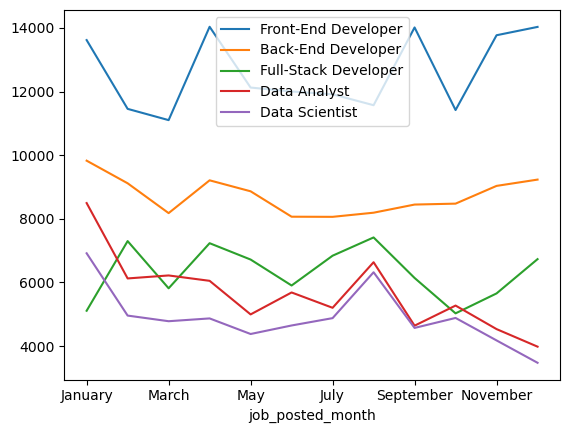

In [49]:
df_US_merged[top_5].plot(kind='line')

In [50]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df['job_posted_month']=df['job_posted_date'].dt.strftime('%b')

In [52]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [5]:
# dict_months={

# }

months=df['job_posted_month'].unique()
dict_months={month: df[df['job_posted_month']==month] for month in months}


In [6]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


In [59]:
df_q1=pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']],ignore_index=True)

<Axes: xlabel='job_posted_month'>

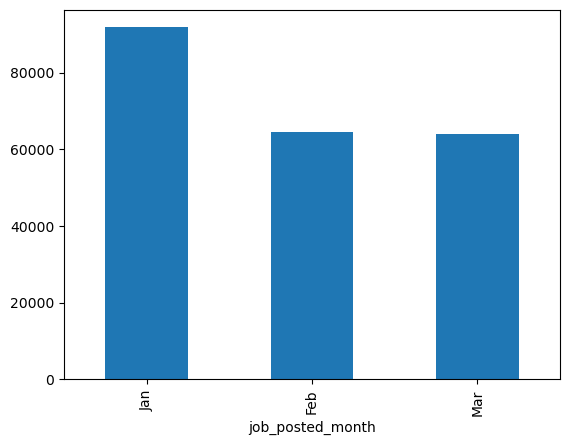

In [60]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

In [7]:
df_q1= pd.concat([dict_months['Jan'],dict_months['Feb'],dict_months['Mar']],ignore_index=True)
df_q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,,,,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']","{'analyst_tools': ['power bi', 'tableau'], 'programming': ['r', 'python', 'sql', 'nosql']}",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,,,,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark']","{'libraries': ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'hadoop', 'spark'], 'programming': ['r', 'python', 'sql']}",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,,,,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,,,,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws'], 'programming': ['sql', 'python']}",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,,,,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python', 'sql']}",Jan

In [8]:
df_q1.head().to_clipboard(sep=',')

In [11]:
df_q1.to_csv('quarter_1.csv')

In [13]:
pd.read_csv('quarter_1.csv',index_col=0)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [14]:
df_q1.to_excel('quarter1.xlsx')

In [15]:
df['salary_year_avg']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
785736   NaN
785737   NaN
785738   NaN
785739   NaN
785740   NaN
Name: salary_year_avg, Length: 785741, dtype: float64

In [16]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [17]:
help(df.apply)


Help on method apply in module pandas.core.frame:

apply(
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None,
    args=(),
    by_row: "Literal[False, 'compat']" = 'compat',
    engine: "Literal['python', 'numba']" = 'python',
    engine_kwargs: 'dict[str, bool] | None' = None,
    **kwargs
) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.

    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.

    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along wh

In [22]:
df_salary=df[pd.notna(df['salary_year_avg'])].copy()
def projected_salary(salary):
    return salary * 1.03
df_salary['salary_year_inflated']=df_salary['salary_year_avg'].apply(projected_salary)

df_salary[['salary_year_avg','salary_year_inflated']] 

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [23]:
df_salary['salary_year_inflated']=df_salary['salary_year_avg'].apply(lambda salary: salary * 1.03 )
df_salary[['salary_year_avg','salary_year_inflated']] 

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [24]:
df['job_skills']

0                                                      None
1         ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2         ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3         ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4         ['bash', 'python', 'oracle', 'aws', 'ansible',...
                                ...                        
785736    ['bash', 'python', 'perl', 'linux', 'unix', 'k...
785737                       ['sas', 'sas', 'sql', 'excel']
785738                              ['powerpoint', 'excel']
785739    ['python', 'go', 'nosql', 'sql', 'mongo', 'she...
785740                                      ['aws', 'flow']
Name: job_skills, Length: 785741, dtype: object

In [26]:
import ast


In [30]:
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

df['job_skills']=df['job_skills'].apply(clean_list)

In [35]:
type(df['job_skills'])

pandas.core.series.Series

In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [5]:
df_exploded=df.explode(column='job_skills')

<Axes: xlabel='job_skills'>

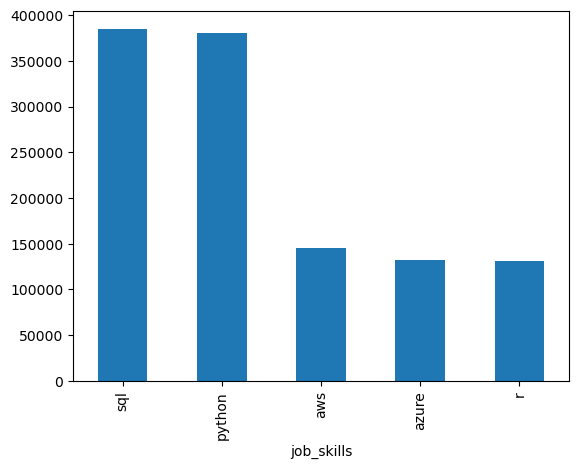

In [6]:
 df_exploded['job_skills'].value_counts().head(5).plot(kind='bar')

In [8]:
skills_count=df_exploded.groupby(['job_title_short','job_skills']).size()


In [9]:
df_skills_count=skills_count.reset_index(name='skills_count')
df_skills_count=df_skills_count.sort_values(by='skills_count',ascending=False)
df_skills_count


,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


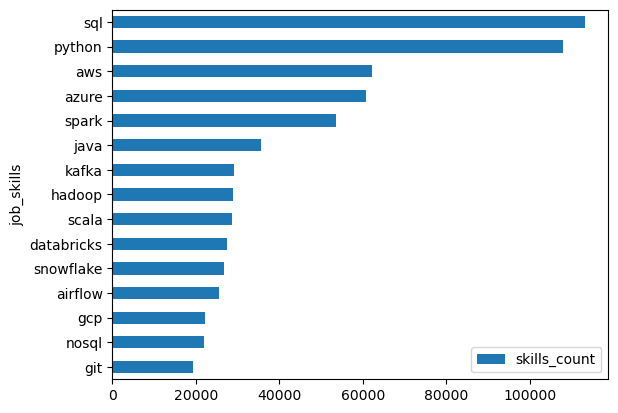

In [13]:
job_tile= 'Data Engineer'
top_skills=15

df_skill_final=df_skills_count[df_skills_count['job_title_short']==job_tile].head(top_skills)
df_skill_final.plot(kind='barh', x='job_skills', y='skills_count')
plt.gca().invert_yaxis()

In [10]:
df_DA=df[df['job_title_short'] == 'Data Analyst'].copy()

In [11]:
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ..."
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}"


In [14]:
df_DA['job_posted_month_no']=df_DA['job_posted_date'].dt.month
df_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"[sql, python, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"[aws, azure]","{'cloud': ['aws', 'azure']}",3


<Axes: xlabel='job_posted_month_no'>

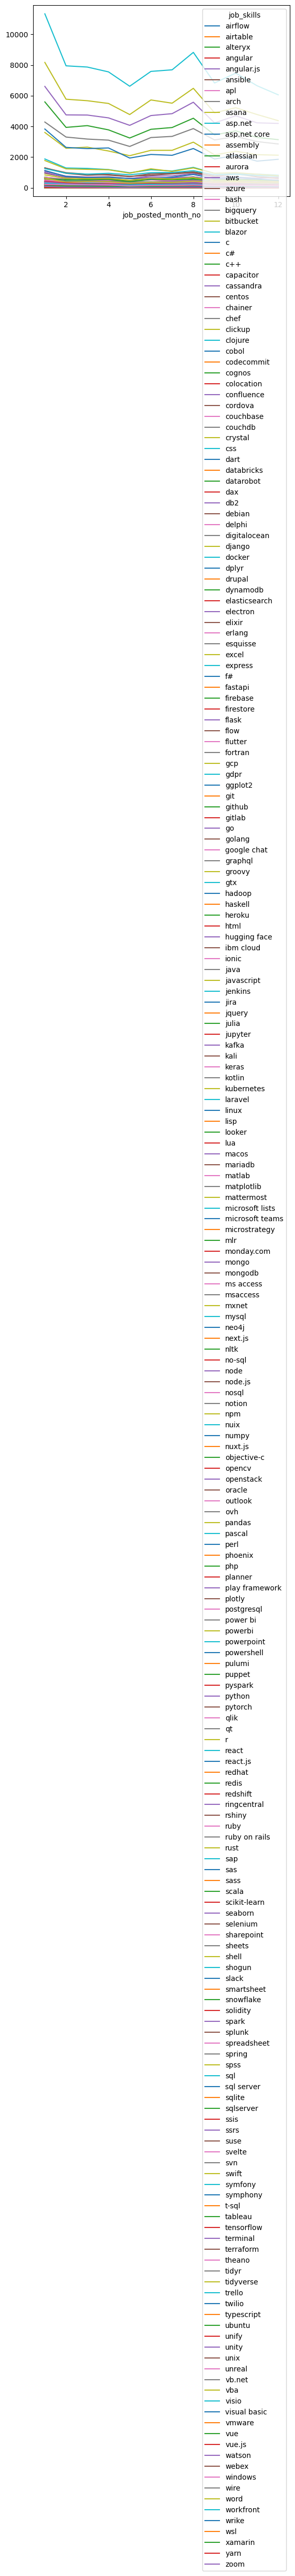

In [23]:
df_DA_exploded=df_DA.explode('job_skills')
df_DA_pivot=df_DA_exploded.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_DA_pivot.plot(kind='line')

In [25]:
df_DA_pivot.loc['Total']=df_DA_pivot.sum()
df_DA_pivot=df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_pivot=df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,xamarin,mattermost,gtx,esquisse,chainer,capacitor,nuxt.js,msaccess,ovh,suse
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,0,0,0,0,0,1,1,0,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,1,0,0,0,0,0,0,0,0,1
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,0,0,0,0,1,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,1,0,0
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,1,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month_no'>

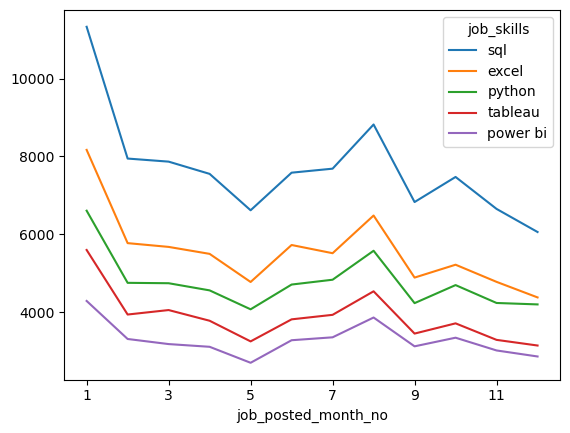

In [26]:
df_DA_pivot.iloc[:,:5].plot(kind='line')

<Axes: xlabel='job_title_short'>

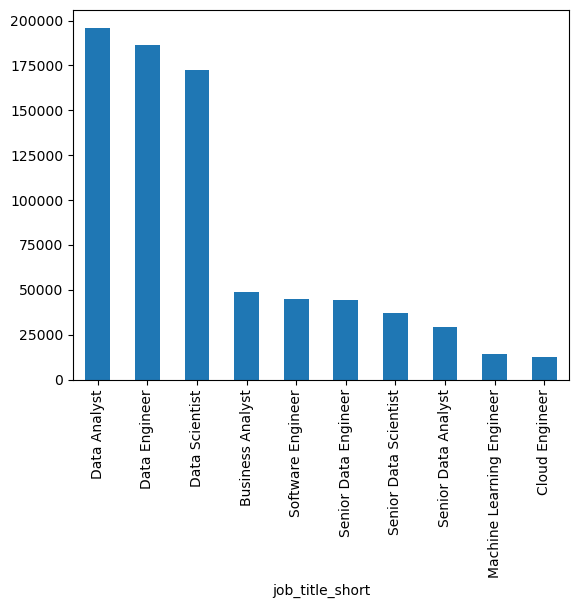

In [29]:
fig, ax=plt.subplots()
df['job_title_short'].value_counts().plot(kind='bar',ax=ax)

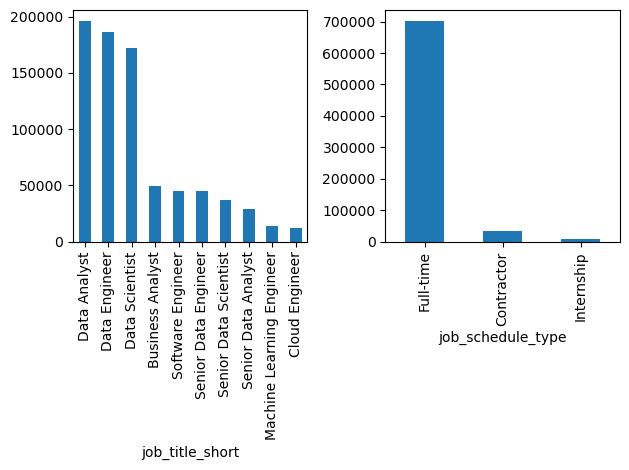

In [31]:
fig, ax=plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

fig.tight_layout()

In [32]:
df_skills_count

,job_title_short,job_skills,skills_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [33]:
job_titles=['Data Scientist', 'Data Engineer', 'Data Analyst']

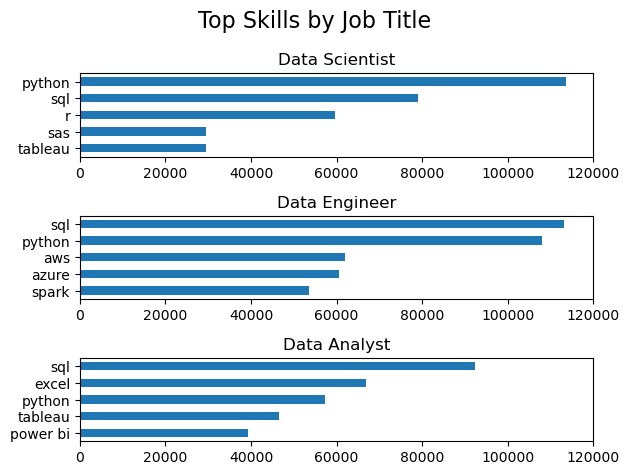

In [45]:
fig,ax=plt.subplots(3,1)
for i, job_title in enumerate(job_titles):
     df_plot=df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
     df_plot.plot(kind='barh',x='job_skills', y='skills_count', ax=ax[i], title=job_title)
     ax[i].invert_yaxis()
     ax[i].set_ylabel('')
     ax[i].legend().set_visible(False)
     ax[i].set_xlim(0, 120000)

fig.suptitle('Top Skills by Job Title', fontsize=16)

fig.tight_layout()

Text(0.5, 1.0, 'Work From Home Distribution')

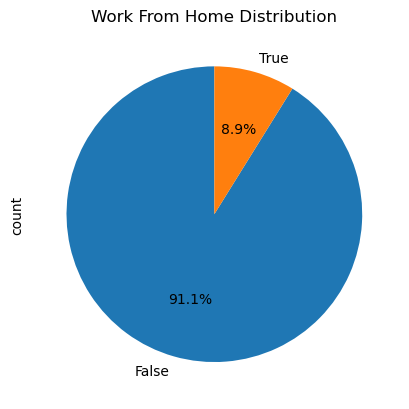

In [55]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90, autopct='%1.1f%%')
plt.title('Work From Home Distribution')

In [56]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


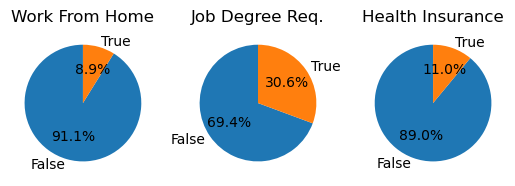

In [61]:
fig, ax=plt.subplots(1,3)
dict_column={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance'
}

for i,(column,title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(),startangle=90, autopct='%1.1f%%', labels=['False','True'])
    ax[i].set_title(title)
plt.show()

In [62]:
df=df[df['job_title_short']=='Data Analyst']

In [73]:
df_exploded=df.explode('job_skills')
skill_stats=df_exploded.groupby('job_skills').agg(
    skills_count=('job_skills','count'),median_salary=('salary_year_avg','median')    
)
skill_stats=skill_stats.sort_values(by='skills_count', ascending=False).head(10)


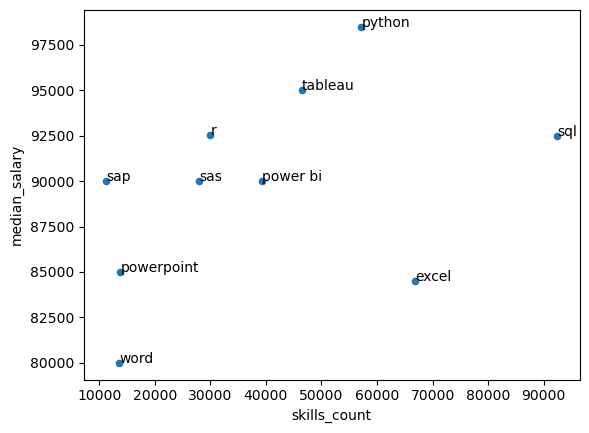

In [75]:
skill_stats.plot(kind='scatter',x='skills_count',y='median_salary')
for i,txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skills_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

In [76]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [77]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

<Axes: xlabel='job_posted_month'>

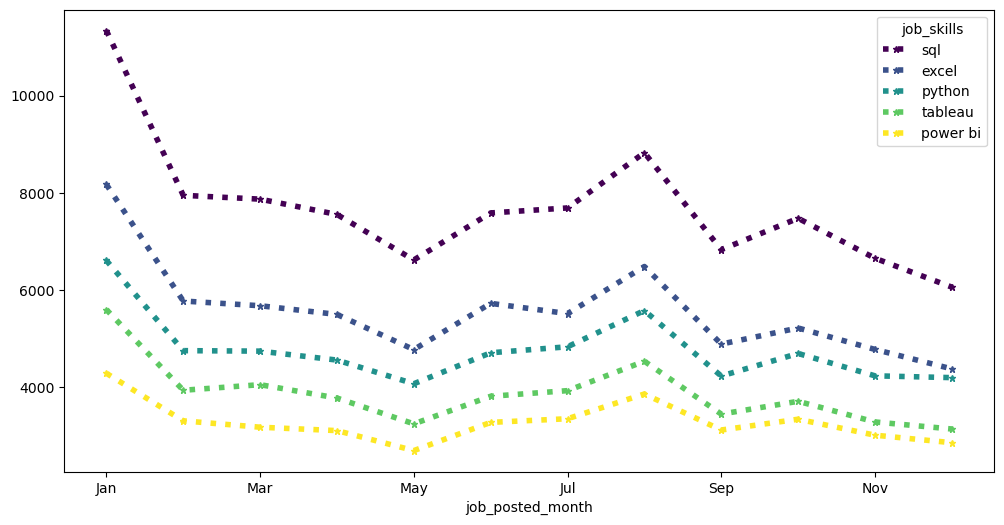

In [86]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',linewidth=4,linestyle=':',colormap='viridis',marker='*', markersize='5', figsize=(12,6)
    
    )

In [89]:
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

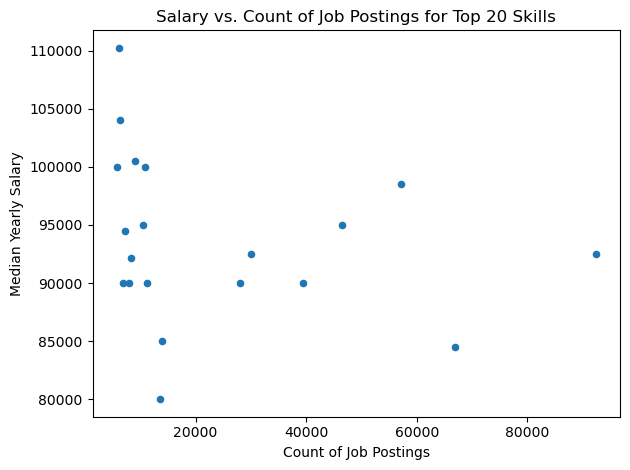

In [90]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

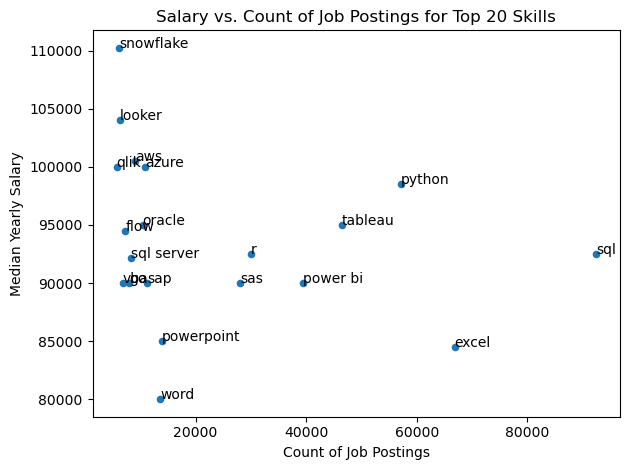

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

In [96]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

(0.0, 250000.0)

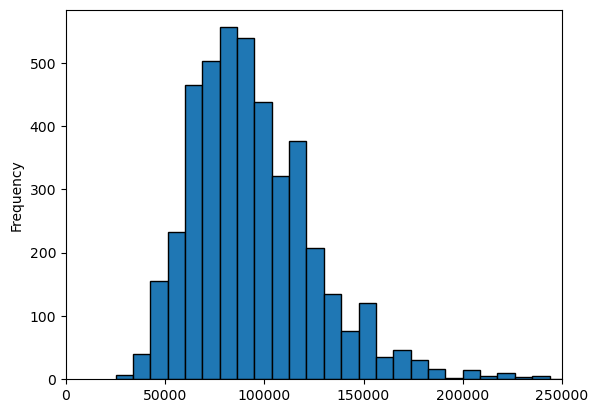

In [105]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=40,edgecolor='black')
plt.xlim(0,250000)

In [107]:
df_DA_US['salary_year_avg'].sample(10)

443361    115000.0
207874     80000.0
648423    125540.0
733061     87950.0
458090     85000.0
764064    137500.0
413018     79500.0
306170     90000.0
278073     60000.0
525806    144481.5
Name: salary_year_avg, dtype: float64

<Axes: >

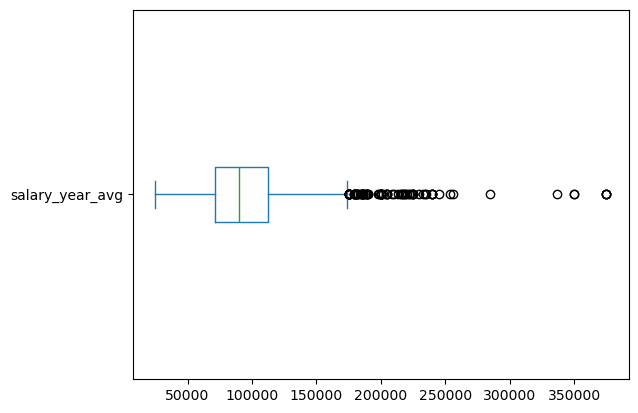

In [110]:
df_DA_US['salary_year_avg'].plot(kind='box',vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1d42befc050>,
 'caps': [<matplotlib.lines.Line2D at 0x1d42bf34190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d42beff750>],
 'medians': [<matplotlib.lines.Line2D at 0x1d42bf34410>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d42bf34550>],
 'means': []}

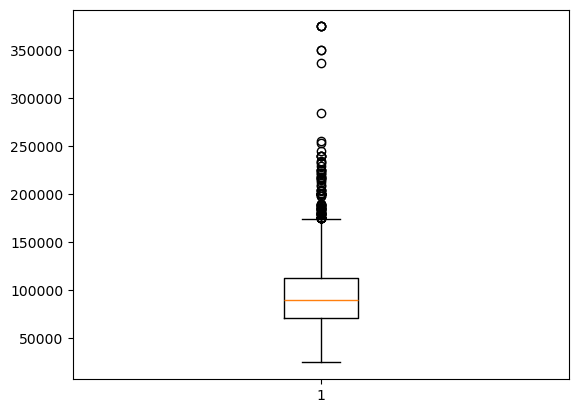

In [109]:
plt.boxplot(df_DA_US['salary_year_avg'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d42bfd9090>,
 'caps': [<matplotlib.lines.Line2D at 0x1d42bfd9310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d42bfd8f50>,
 'medians': [<matplotlib.lines.Line2D at 0x1d42bfd9590>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d42bfd96d0>,
 'means': []}

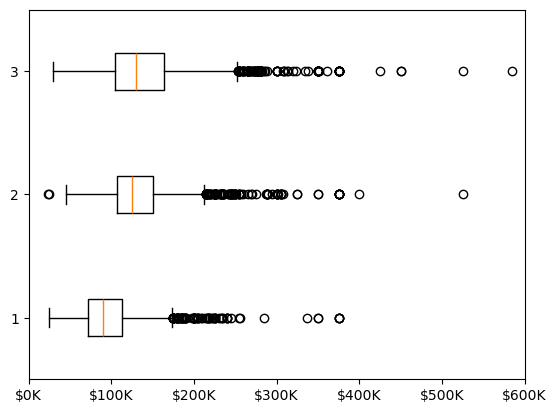

In [116]:
job_titles=['Data Analyst', 'Data Engineer', 'Data Scientist']
df_US=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset=['salary_year_avg'])


job_list=[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.boxplot(job_list,label=job_titles,vert=False)

In [113]:
job_list[0]

109        89000.0
180        90250.0
410       133285.0
988        62623.0
1413       71300.0
            ...   
782637     70000.0
782798    111175.0
783588    125000.0
783866    115000.0
784882     87500.0
Name: salary_year_avg, Length: 4350, dtype: float64

In [117]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [118]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [119]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US['job_skills']

109        python
109             r
109       alteryx
109       tableau
180         excel
           ...   
784882        sql
784882        vba
784882    tableau
784882      excel
784882    alteryx
Name: job_skills, Length: 17440, dtype: object

In [121]:
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [123]:
df_DA_Top_Pay=df_DA_US_group.sort_values(by='median',ascending=False).head(10)

In [124]:
df_DA_Top_Pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [129]:
df_DA_Skills=df_DA_US_group.sort_values(by="count", ascending=False).head(10).sort_values(by='median',ascending=False)
df_DA_Skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


(0.0, 206062.5)

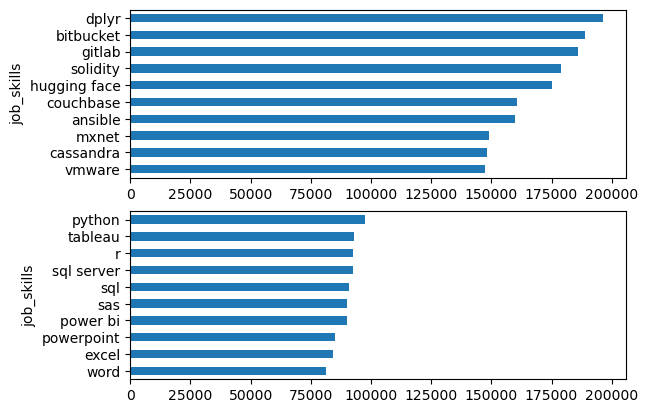

In [138]:
fig, ax=plt.subplots(2,1)
df_DA_Top_Pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
df_DA_Skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_xlim(ax[0].get_xlim())

In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

import seaborn as sns

# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])



In [ ]:
sns.barplot(data=df_DA_Top_Pay,x='Median',y=df_DA_Top_Pay.index, ax=ax[0])